In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from keras import layers, models

In [2]:
IMAGE_SIZE = (360, 360)
BATCH_SIZE = 12
EPOCHS = 16

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(360, 360, 3)),
    layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

In [ ]:
def load_images(directory, limit=120):
    image_list = []
    count = 0
    for filename in sorted(os.listdir(directory)):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename)).resize(IMAGE_SIZE)
            img_array = np.array(img) / 255.0  # Normalize pixel values
            image_list.append(img_array)
            count += 1
            if count >= limit:
                break
    return np.array(image_list)

# Load hazy and clear images 
hazy_images = load_images("/content/drive/MyDrive/mix-dataset/Hazy")
clear_images = load_images("/content/drive/MyDrive/mix-dataset/Good")

In [ ]:
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(hazy_images, clear_images, batch_size=BATCH_SIZE, epochs=EPOCHS)

# Save model
model.save("dehazing_model3.h5")

Epoch 1/16
10/10 [==============================] - 295s 29s/step - loss: 0.0793
Epoch 2/16
10/10 [==============================] - 282s 28s/step - loss: 0.0757
Epoch 3/16
10/10 [==============================] - 293s 29s/step - loss: 0.0660
Epoch 4/16
10/10 [==============================] - 278s 28s/step - loss: 0.0471
Epoch 5/16
10/10 [==============================] - 279s 28s/step - loss: 0.0407
Epoch 6/16
10/10 [==============================] - 279s 28s/step - loss: 0.0392
Epoch 7/16
10/10 [==============================] - 278s 28s/step - loss: 0.0382
Epoch 8/16
10/10 [==============================] - 279s 28s/step - loss: 0.0372
Epoch 9/16
10/10 [==============================] - 279s 28s/step - loss: 0.0394
Epoch 10/16
10/10 [==============================] - 280s 28s/step - loss: 0.0453
Epoch 11/16
10/10 [==============================] - 282s 28s/step - loss: 0.0412
Epoch 12/16
10/10 [==============================] - 282s 28s/step - loss: 0.0382
Epoch 13/16
10/10 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 413ms/step


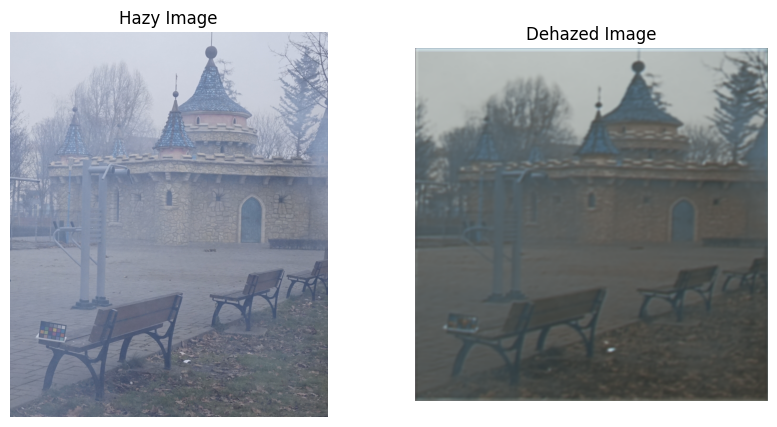

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

# Load the trained model
model = load_model("dehazing_model3.h5")

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).resize((360, 360))
    img_array = np.array(img) / 255.0
    return img_array.reshape(1,360,360, 3)

# Function to dehaze an image
def dehaze_image(model, hazy_image_path):
    hazy_image = preprocess_image(hazy_image_path)
    dehazed_image = model.predict(hazy_image)
    dehazed_image = (dehazed_image * 255.0).astype(np.uint8)
    return dehazed_image[0]

# Function to display image
def display_image(image):
    plt.imshow(image) 
    plt.axis('off')
    plt.show()

# Dehaze a single image and display
hazy_image_path = "/content/o1.png"
hazy_image_path2 = "/content/o1.png"
hazy_image2 = Image.open(hazy_image_path2)
hazy_image = Image.open(hazy_image_path)

# Repeat dehazing process 3 times for the output image as input
for _ in range(3):
    dehazed_image = dehaze_image(model, hazy_image_path)
    hazy_image = Image.fromarray(dehazed_image) 

# Display hazy and dehazed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Hazy Image')
plt.imshow(hazy_image2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Dehazed Image')
plt.imshow(dehazed_image)
plt.axis('off')

plt.show()